## Solution: Grocery Fruit Problem using Cobb-Douglas Utility 
Consider a utility maximization problem with the Cobb-Douglas utility function, $U(x_{1},x_{2}) = x_{1}^{\alpha}x_{2}^{1-\alpha}$, subject to a budget constraint. 
The Lagrangian for this system is given by:

$$
\begin{equation*}
\mathcal{L}(x,\lambda) = x_{1}^{\alpha}x_{2}^{1-\alpha} + \lambda\cdot\left(I-c_{1}x_{1}-c_{2}x_{2}\right)
\end{equation*}
$$

which gives the first-order optimality conditions:

$$
\begin{eqnarray*}
\frac{\partial\mathcal{L}}{\partial{x_{1}}} & = & \alpha\cdot{x_{1}^{\alpha-1}}x_{2}^{1-\alpha} - \lambda\cdot{c_{1}} = 0 \\
\frac{\partial\mathcal{L}}{\partial{x_{2}}} & = & (1-\alpha)\cdot{x_{1}^{\alpha}x_{2}^{-\alpha}} - \lambda\cdot{c_{2}} = 0 \\
\frac{\partial\mathcal{L}}{\partial\lambda} & = & I - c_{1}x_{1} - c_{2}x_{2} = 0
\end{eqnarray*}
$$

This system of first-order optimality conditions can be solved for the optimal consumption levels of $x_{1}$ and $x_{2}$. However, it is non-linear. Thus, we often need to use numerical methods to find the optimal values of $x_{1}$ and $x_{2}$.

### Learning objectives
In this example, we'll use a numerical approach to solve the system of first-optimality conditions for the optimal allocation between `apples` and `oranges` for a `Cobb-Douglas` utility function.

## Setup

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-5760-Examples-F23`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5760-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5760-Examples-F23/Manifest.toml`


## Compute the optimal mix of `Apples` and `Oranges`

In [2]:
# initialize -
α = [0.55, 0.45]; # coefficients
c = [2.0, 4.0]; # price of x1 and x2
total_budget = 100.0;

# build my problem object -
problem = build(MySimpleCobbDouglasChoiceProblem, (
    
    initial = 0.1*ones(2), # initial guess
    α = α, # coefficients
    c = c, # price of x1 and x2
    I = total_budget, # income
    
    # how much of x₁ and x₂ can be we buy?
    bounds = [
        0.0 100.0; # L U
        0.0 100.0; # L U
    ]
));

# call tghe solve function. This will return a dictionary -
solution = solve(problem);

This is MadNLP version v0.7.0, running with umfpack

Number of nonzeros in constraint Jacobian............:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 0.00e+00 8.14e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1 -2.4718420e-01 1.55e-15 3.40e-01  -1.0 8.73e-01    -  6.56e-01 1.00e+00h  

In [3]:
solution

Dict{String, Any} with 3 entries:
  "argmax"          => [27.5, 11.25]
  "budget"          => 100.0
  "objective_value" => 18.393

#### Check: Does this solution satisfy the first-order optimality conditions?

In [4]:
# get the solution values from the solution dictionary
x̂₁ = solution["argmax"][1];
x̂₂ = solution["argmax"][2];
c₁ = c[1];
c₂ = c[2];
I = solution["budget"]

# compute the marginal utility at the optimum -
Ū₁ = α[1]*(x̂₁^(α[1]-1))*(x̂₂^(1-α[1]))
Ū₂ = (1-α[1])*(x̂₁^(α[1]))*(x̂₂^(-α[1]))

# compute the Lagrange multiplier -
λ = Ū₁/c₁;

# Compute the first-order conditions -
E1 = Ū₁ - λ*c₁
E2 = Ū₂ - λ*c₂
E3 = I - (c₁*x̂₁ + c₂*x̂₂)

# print -
println("First-order optimality conditions: $(E1), $(E2), $(E3)")

First-order optimality conditions: 0.0, -8.143430374474292e-11, 0.0


## Visualize: Budget Line and the Optimal Solution

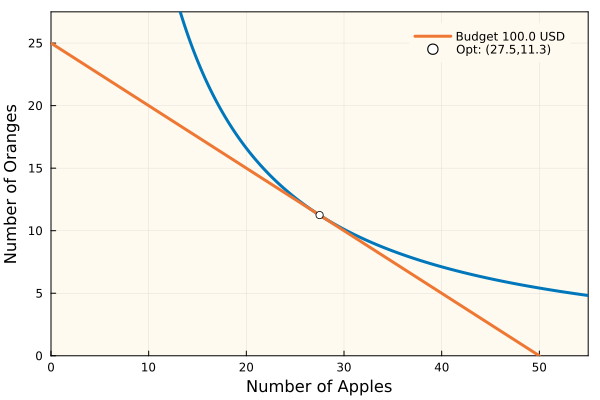

In [5]:
# ok, let's grab the results dictionary, and the Uopt -
Uopt = round(solution["objective_value"], sigdigits=4);
xopt = solution["argmax"];
c = problem.c;
budget_value = problem.I;
xlim = [0.0, 1.1*(budget_value/c[1])];
ylim = [0.0, 1.1*(budget_value/c[2])];
x1_opt = round(xopt[1]; sigdigits=3)
x2_opt = round(xopt[2]; sigdigits=3)

# compute the indifference curve -
INC = indifference(problem, Uopt, xlim)

# compute the budget -
BC = budget(problem, xlim)

# make the plots -
plot(INC[:,1],INC[:,2],label="", lw=3, c=colors[1],
    bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
plot!(BC[:,1],BC[:,2], label="Budget $(budget_value) USD", lw=3,c=colors[3], xlim = xlim, ylim = ylim)
scatter!([xopt[1]], [xopt[2]], ms=4, c="white", mec=colors[4], label="Opt: ($(x1_opt),$(x2_opt))")
xlabel!("Number of Apples", fontsize=18)
ylabel!("Number of Oranges", fontsize=18)